In [4]:
import sys
import os
import pandas as pd
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import json

project_root = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [3]:
# average volume, top 10 levels
processed_dir = os.path.join(project_root, 'data', 'processed')
tickers = [name for name in os.listdir(processed_dir) if os.path.isdir(os.path.join(processed_dir, name))]
print(tickers)
time_col = 0

avg_diffs = {}
for ticker in tickers:
    ob_dir = os.path.join(processed_dir, ticker, 'orderbooks', 'scaled')
    if os.path.isdir(ob_dir):
        csv_files = [f for f in os.listdir(ob_dir) if f.endswith('.csv')]
        if csv_files:
            first_csv = sorted(csv_files)[0]
            csv_path = os.path.join(ob_dir, first_csv)
            df_ob = pl.read_csv(csv_path).to_pandas()
            # Compute the average difference between consecutive values in column 1
            col1 = df_ob.iloc[:, time_col]
            avg_diff = col1.diff().abs().mean()
            print(f"Ticker: {ticker}, Average Update difference: {avg_diff}")
            avg_diffs[ticker] = float(avg_diff)
        else:
            print(f"No CSV files found in {ob_dir}")
    else:
        print(f"Directory does not exist: {ob_dir}")
del avg_diffs['AMZN']
del avg_diffs['WFC']
    

['AMZN', 'AAPL', 'MSFT', 'NFLX', 'NVDA', 'META', 'GOOG', 'MTCH', 'BAC', 'JPM', 'PLTR', 'WFC', 'TSLA', 'ORCL']
Ticker: AMZN, Average Update difference: 0.019377810755895137
Ticker: AAPL, Average Update difference: 0.016324748125661145
Ticker: MSFT, Average Update difference: 0.05652782381722122
Ticker: NFLX, Average Update difference: 0.28448296189298344
Ticker: NVDA, Average Update difference: 0.008002265498323332
Ticker: META, Average Update difference: 0.06260781371282477
Ticker: GOOG, Average Update difference: 0.011790209912208208
Ticker: MTCH, Average Update difference: 0.4402842687979989
Ticker: BAC, Average Update difference: 0.08487866186096288
Ticker: JPM, Average Update difference: 0.09554441588830866
Ticker: PLTR, Average Update difference: 0.00968540544796652
Ticker: WFC, Average Update difference: 0.03834952569793524
Ticker: TSLA, Average Update difference: 0.011167860198824656
Ticker: ORCL, Average Update difference: 0.16073876408434803


In [4]:
print(avg_diffs)
avg_diffs_df = pd.DataFrame(list(avg_diffs.items()), columns=['Ticker', 'Average Update Difference'])
avg_diffs_df['updates_per_second'] = 1 / avg_diffs_df['Average Update Difference']

{'AAPL': 0.016324748125661145, 'MSFT': 0.05652782381722122, 'NFLX': 0.28448296189298344, 'NVDA': 0.008002265498323332, 'META': 0.06260781371282477, 'GOOG': 0.011790209912208208, 'MTCH': 0.4402842687979989, 'BAC': 0.08487866186096288, 'JPM': 0.09554441588830866, 'PLTR': 0.00968540544796652, 'TSLA': 0.011167860198824656, 'ORCL': 0.16073876408434803}


/tmp/ipykernel_1590465/288676645.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ticker', y='updates_per_second', data=sorted_df, palette='viridis')


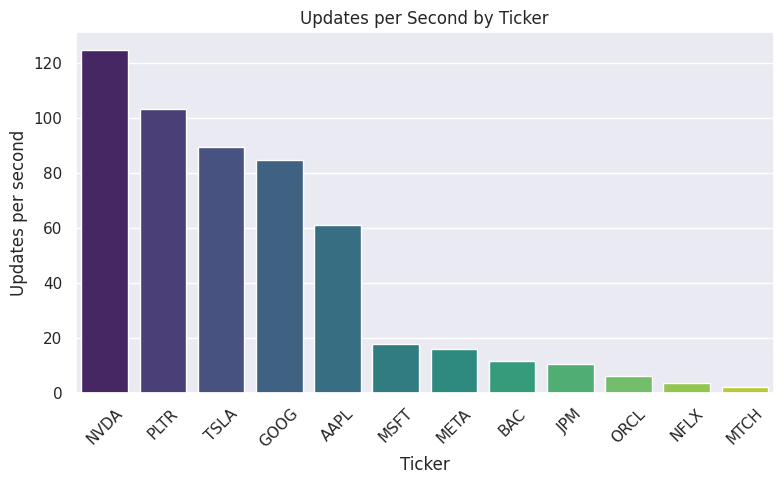

In [5]:
# bar plot of updates per second
sns.set()
plt.figure(figsize=(8, 5))
sorted_df = avg_diffs_df.sort_values('updates_per_second', ascending=False).reset_index(drop=True)
sns.barplot(x='Ticker', y='updates_per_second', data=sorted_df, palette='viridis')
plt.xlabel('Ticker')
plt.ylabel('Updates per second')
plt.title('Updates per Second by Ticker')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
aapl_raw_file = rf'/cs/student/projects3/cf/2024/benjhunt/deep-lob-project/data/raw/_data_dwn_43_456__AAPL_2025-06-02_2025-06-04_10/AAPL_2025-06-04_34200000_57600000_orderbook_10.csv'
aapl_raw = pl.read_csv(aapl_raw_file, has_header=False).to_pandas()
print(aapl_raw.columns)
aapl_raw.columns = [
    sub
    for i in range(1, 11)
    for sub in [f'ASKp{i}', f'ASKs{i}', f'BIDp{i}', f'BIDs{i}']
]
aapl_raw.head


Index(['column_1', 'column_2', 'column_3', 'column_4', 'column_5', 'column_6',
       'column_7', 'column_8', 'column_9', 'column_10', 'column_11',
       'column_12', 'column_13', 'column_14', 'column_15', 'column_16',
       'column_17', 'column_18', 'column_19', 'column_20', 'column_21',
       'column_22', 'column_23', 'column_24', 'column_25', 'column_26',
       'column_27', 'column_28', 'column_29', 'column_30', 'column_31',
       'column_32', 'column_33', 'column_34', 'column_35', 'column_36',
       'column_37', 'column_38', 'column_39', 'column_40'],
      dtype='object')


<bound method NDFrame.head of            ASKp1  ASKs1    BIDp1  BIDs1    ASKp2  ASKs2    BIDp2  BIDs2  \
0        2030000    611  2029700    161  2030100    877  2029100    246   
1        2030000    611  2029100    246  2030100    877  2029000      5   
2        2030000    611  2029100    227  2030100    877  2029000      5   
3        2030000    711  2029100    227  2030100    877  2029000      5   
4        2029700    100  2029100    227  2030000    711  2029000      5   
...          ...    ...      ...    ...      ...    ...      ...    ...   
1614500  2029100    737  2028200    100  2029200    100  2028100    781   
1614501  2029100    737  2028200    100  2029200    100  2028100    781   
1614502  2029100    737  2028200    100  2029200    100  2028100    781   
1614503  2029100    737  2028200    100  2029200    100  2028100    781   
1614504  2029100   1637  2028200    100  2029200    100  2028100    781   

           ASKp3  ASKs3  ...    BIDp8  BIDs8    ASKp9  ASKs9    BIDp9

In [18]:
aapl_mid = (aapl_raw['ASKp1'] + aapl_raw['BIDp1']) / (2 * 10_000)
aapl_mid.size

1614505

220524.0762239449


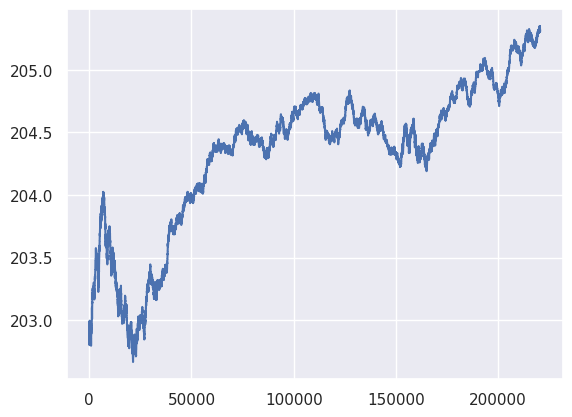

In [21]:
updates_in_first_hour = 60*60/ avg_diffs['AAPL']
print(updates_in_first_hour)
first_hour_aapl = aapl_mid[:int(updates_in_first_hour)]
plt.plot(first_hour_aapl)


In [ ]:
aapl_processed_path = fr"/cs/student/projects3/cf/2024/benjhunt/deep-lob-project/data/raw/_data_dwn_43_456__AAPL_2025-06-02_2025-06-04_10/AAPL_2025-06-04_34200000_57600000_message_10.csv"
aapl_processed = pl.read_csv(aapl_processed_path, has_header=False).to_pandas()
# aapl_processed
row = aapl_processed[aapl_processed['column_1'] > 34200.000792 + 600].iloc[0,:]
row

,column_1,column_2,column_3,column_4,column_5,column_6,column_7
101241,34800.027057,1,58679081,75,2046700,-1,null
101242,34800.027304,3,58671141,100,2046700,-1,null
101243,34800.027626,3,58670917,20,2046400,1,null
101244,34800.027664,3,58671041,75,2046400,1,null
101245,34800.027729,1,58679661,75,2046400,1,null
